<a href="https://colab.research.google.com/github/camaartins/modulo1_EBA/blob/main/Atividade_1_EBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercício proposto:**
### Somos a primeira analista de dados contratada de u ma rede imoiliária nos EUA e recebemos uma base de dados que contém casas vendidas. Temos a missão de, usando apenas **estatística descritiva**, entender como os dados se comportam e entender algumas variáveis que podem impactar no preço das casas.

#Iniciando importação

In [55]:
# importando as bibliotecas

import pandas as pd #para manipular tabelas
import seaborn as sns #para manipular gráficos
import numpy as np #para fazer operações matemáticas
import matplotlib.pyplot as plt #para manipular gráficos

In [56]:
#importando a tabela

df = pd.read_csv("house_price.csv")
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


# Entendendo as colunas do meu df:

**SalePrice:** preço de venda da minha casa

**OverallQual:** condição geral do material de acabamento da casa, corretores dão a nota geral. Vai de 0 a 10.

**OverallCond:** condição geral da casa, nota geral que foi dada para a casa. Vai de 0 a 10.

**BedroomAbvGr:** quantidade de quartos acima do solo (sem contar porão).

**TotRmsAbvGrd:** quantidade total de cômodos acima do solo (sem contar porão).

**GrLivArea:** área total da casa acima do solo. Medida em ft.

**TotalBsmtSF:** total da área do porão. Medida em ft.

**YearBuilt:** ano de construção.

**MSZoning:** zona em que se encontra (comercial, rural etc).

**Utilities:** mostra se a casa tinha gás/água encanada etc.

**BidgType:** tipo da casa (só uma, germinada etc).

In [57]:
# analisando o tipo de dados que estou trabalhando

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Primeira coisa quando se começa uma análise é ver se tem nulos no df. Nulo é uma célula que não foi preenchida, e isso pode prejudicar a análise

In [58]:
df.isnull().sum()

# pode ser df.isna().sum() também

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Como nenhuma coluna minha tem valor vazio, posso seguir a análise tranquilamente que não serei prejudicada. Caso alguma coluna tivesse vários valores vazios, eu deveria buscar outra coluna com informação equivalente para trabalhar.

# Análise prévia da coluna SalePrice

In [59]:
# Fazendo algumas estatísticas descritivas

mean = df['SalePrice'].mean() #média
median = df['SalePrice'].median() #mediana
mode = df['SalePrice'].mode() #moda

print('mean:', mean, 'median:', median, 'mode:', mode)

mean: 180921.19589041095 median: 163000.0 mode: 0    140000
Name: SalePrice, dtype: int64


Tenho média: 180921.19589041095, mediana: 163000.0 e moda: 140000.
Como pode ser notado, minha média é bem maior que a mediana, isso pode indicar que existe algum outlier puxando minha média para cima. Abaixo buscarei a comprovação disso.

<Axes: ylabel='SalePrice'>

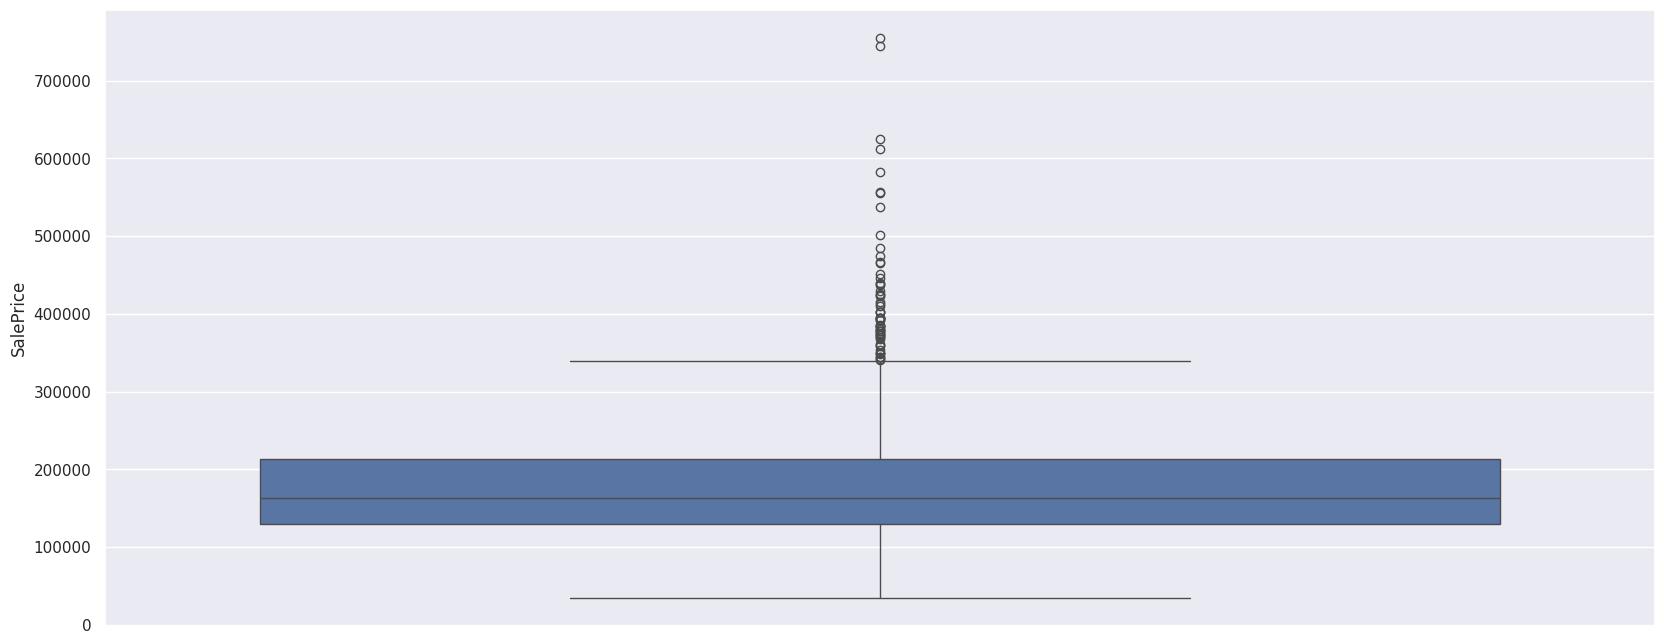

In [60]:
sns.boxplot(df.SalePrice)

O limite inferior está abaixo de 100.000 e vale ressaltar que não tem outlier abaixo disso. A mediana está como verificado anteriormente, proxima de 163.000. O Limite superior proximo de 350.000 e acima disso tem vários outliers. Esses valores são os que, provavelmente, estão causando a discrepância da média com a mediana. Agora, para melhor definição de valores, vamos analisar os principais cálculos para a coluna SalePrice.

In [61]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Hipóteses

É interessante criar hipóteses para tentar validá-las com dados. Assim:

Das variáveis **numéricas**, podemos pensar em algumas hipóteses:

1.   A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros;
2. A média/mediana da quantidade de cômodos/quartos/área/banheiros é maior em apartamentos mais caros;
3. Os apartamentos mais caros são mais antigos.

Das variáveis **categóricas**, podemos pensar em algumas hipóteses:
4. Existe diferença de preço de acordo com sua localização (zona);
5. As utilidades (água, gás etc) existentes na casa tem influência no preço;
6. O tipo de habitação influencia o preço (duplex, condomínio etc).







# Análise numérica

In [62]:
#verificando se tem indício de outlier e se os dados fazem sentido

df.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


Para validarmos as hipóteses, vamos criar uma coluna que nos diga se a casa era "cara" ou se a casa era "barata" - sendo que o que definimos como "cara" são as casas acima do percentil 75 (214k) e como "baratas" as casas abaixo desse percentil 75. (algo arbitrário)

In [63]:
df['categoria_preco'] = np.where(df['SalePrice']>214000, 'cara', 'barata')

df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,categoria_preco
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,barata
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,barata
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,cara
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,barata


Vamos agora começar a calcular as estatísticas de cada uma das categorias criadas.

<ipython-input-64-065abaa473e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot( x = 'categoria_preco', y = 'OverallQual', data = df, palette = 'viridis')


média: categoria_preco
barata    5.588342
cara      7.649171
Name: OverallQual, dtype: float64
mediana: categoria_preco
barata    6.0
cara      8.0
Name: OverallQual, dtype: float64


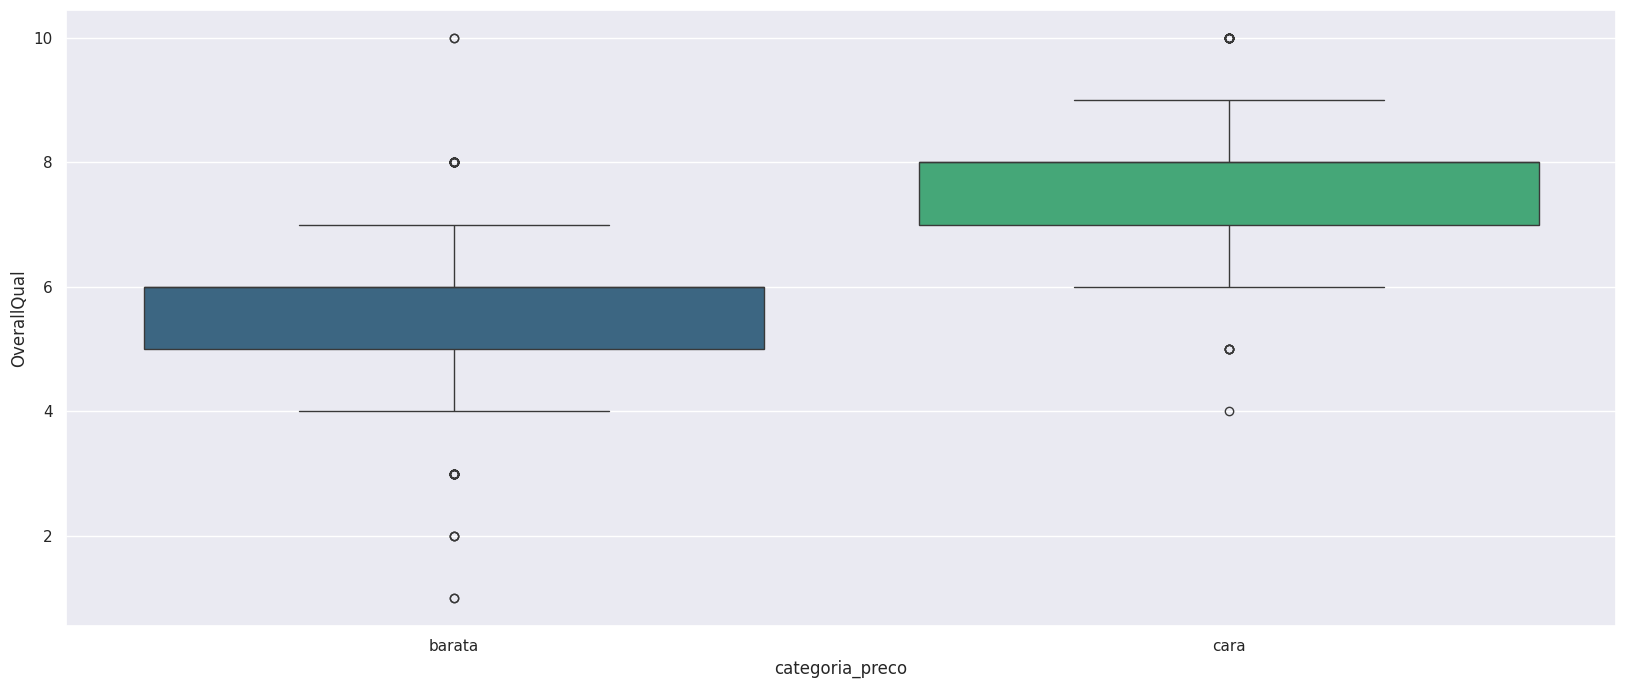

In [64]:
#analisando qualidade de material da casa por categoria de preço

fig = sns.boxplot( x = 'categoria_preco', y = 'OverallQual', data = df, palette = 'viridis')

#agora, vou agrupar o dataset e agrupar por categoria de preço para calcular a média

print('média:', df.groupby('categoria_preco')['OverallQual'].mean())
print('mediana:', df.groupby('categoria_preco')['OverallQual'].median())

No geral, através da análise do boxplot, pode-se notar que as casas mais baratas tendem a ter menor qualidade. Entretanto, existem alguns outliers e até mesmo o limite superior do boxplot, que condiz com o Q1 das casas mais caras. Por isso, para uma informação mais certeira, seria necessário um **teste de hipótese** para avaliar as médias.

<ipython-input-65-62bc88a1f88e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x = 'categoria_preco', y = 'OverallCond', data = df, palette = 'viridis')


média: categoria_preco
barata    5.631148
cara      5.406077
Name: OverallCond, dtype: float64
mediana: categoria_preco
barata    5.0
cara      5.0
Name: OverallCond, dtype: float64


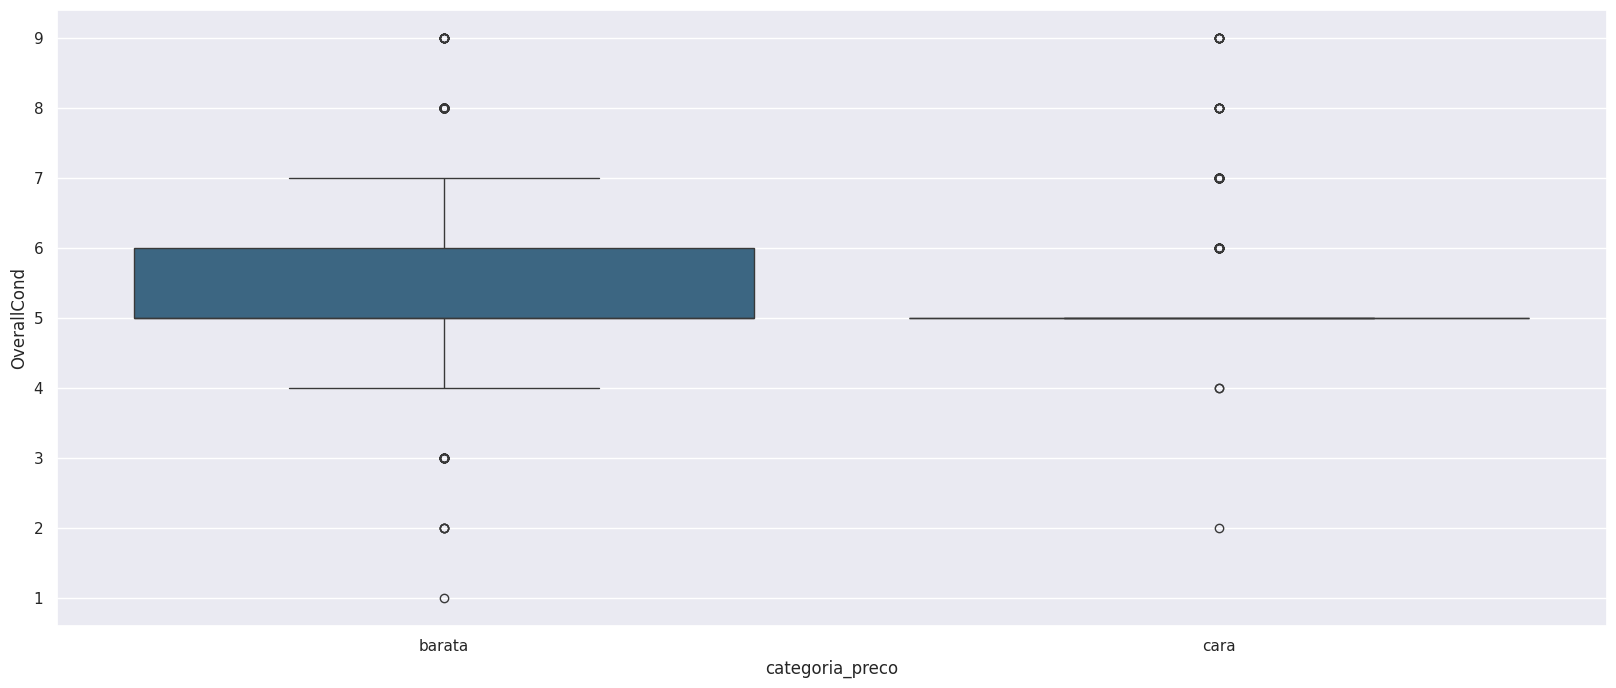

In [65]:
#analisando qualidade geral da casa por categoria de preço
fig = sns.boxplot(x = 'categoria_preco', y = 'OverallCond', data = df, palette = 'viridis')

print('média:', df.groupby('categoria_preco')['OverallCond'].mean())
print('mediana:', df.groupby('categoria_preco')['OverallCond'].median())

Quando se comparam os dois boxplots, o das casas caras está muito estranho. Devemos, então, buscar o porque disso.

In [66]:
#aprofundando na categoria cara para entender porque está estranho o gráfico

# df.query("categoria_preco == 'cara'")[['categoria_preco', 'OverallCond']] também funcionaria

df[df.categoria_preco == 'cara'][['categoria_preco', 'OverallCond']]

,categoria_preco,OverallCond
2,cara,5
4,cara,5
6,cara,5
11,cara,5
13,cara,5
...,...,...
1437,cara,5
1442,cara,5
1447,cara,5
1451,cara,5


In [67]:
df[df.categoria_preco == 'cara'].OverallCond.value_counts()

OverallCond
5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: count, dtype: int64

Por algum motivo, temos inúmeras notas 5 que fazem com que os outros resultados sejam considerados basicamente como outliers.

<ipython-input-68-43d063f0eb43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x = 'categoria_preco', y = 'TotRmsAbvGrd', data = df, palette = 'viridis')


média: categoria_preco
barata    6.122951
cara      7.715470
Name: TotRmsAbvGrd, dtype: float64
mediana: categoria_preco
barata    6.0
cara      8.0
Name: TotRmsAbvGrd, dtype: float64


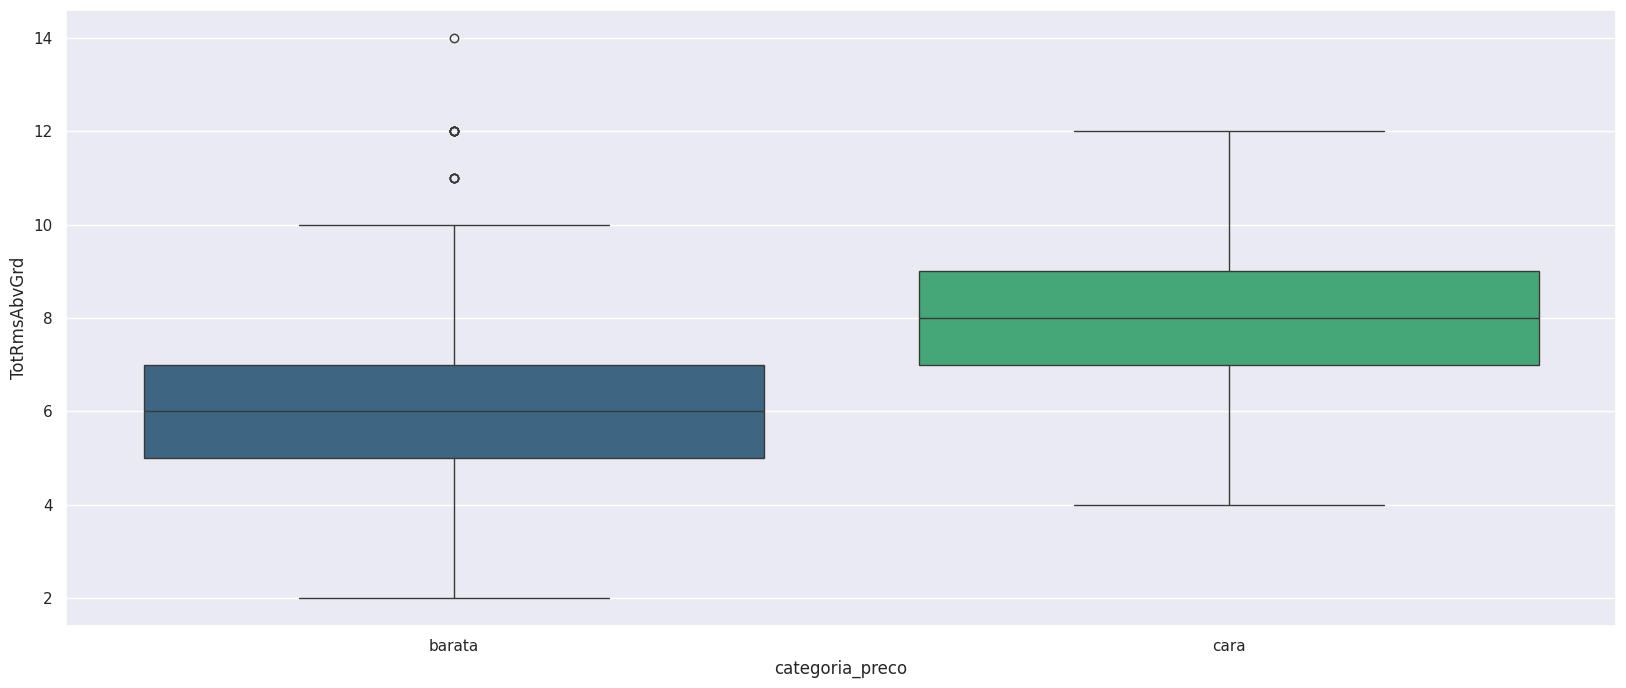

In [68]:
#analisando total de cômodos da casa por categoria de preço

fig = sns.boxplot(x = 'categoria_preco', y = 'TotRmsAbvGrd', data = df, palette = 'viridis')

print('média:', df.groupby('categoria_preco')['TotRmsAbvGrd'].mean())
print('mediana:', df.groupby('categoria_preco')['TotRmsAbvGrd'].median())

<ipython-input-69-c8fb52e13bd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x= 'categoria_preco', y = 'GrLivArea', data = df, palette = 'viridis')


média: categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64
mediana: categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64


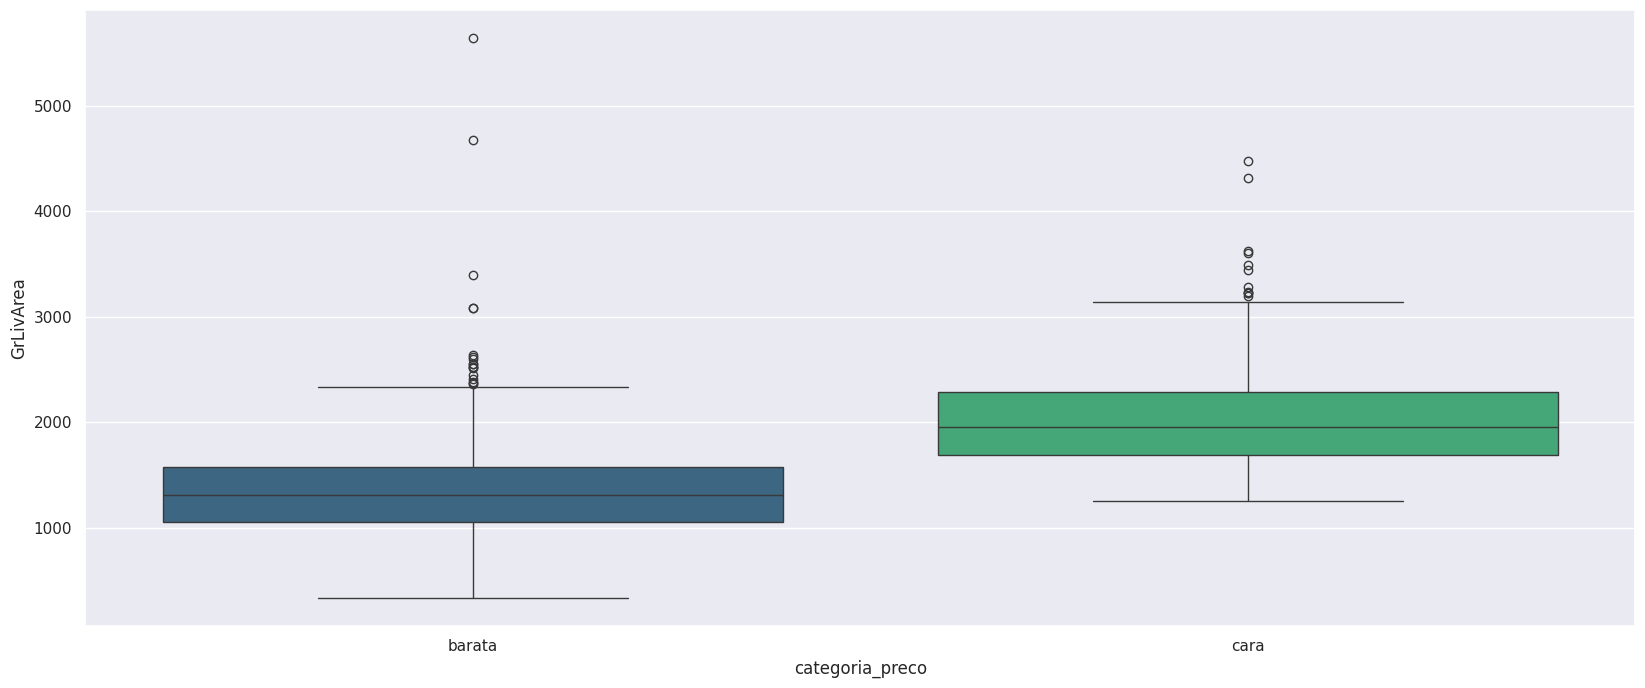

In [69]:
#analisando área total da casa por categoria de preço

fig = sns.boxplot(x= 'categoria_preco', y = 'GrLivArea', data = df, palette = 'viridis')
print('média:', df.groupby('categoria_preco')['GrLivArea'].mean())
print('mediana:', df.groupby('categoria_preco')['GrLivArea'].mean())

<ipython-input-70-790626b3293f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x= 'categoria_preco', y = 'TotalBsmtSF', data = df, palette = 'viridis')


média: categoria_preco
barata     936.475410
cara      1424.301105
Name: TotalBsmtSF, dtype: float64
mediana: categoria_preco
barata     912.0
cara      1452.5
Name: TotalBsmtSF, dtype: float64


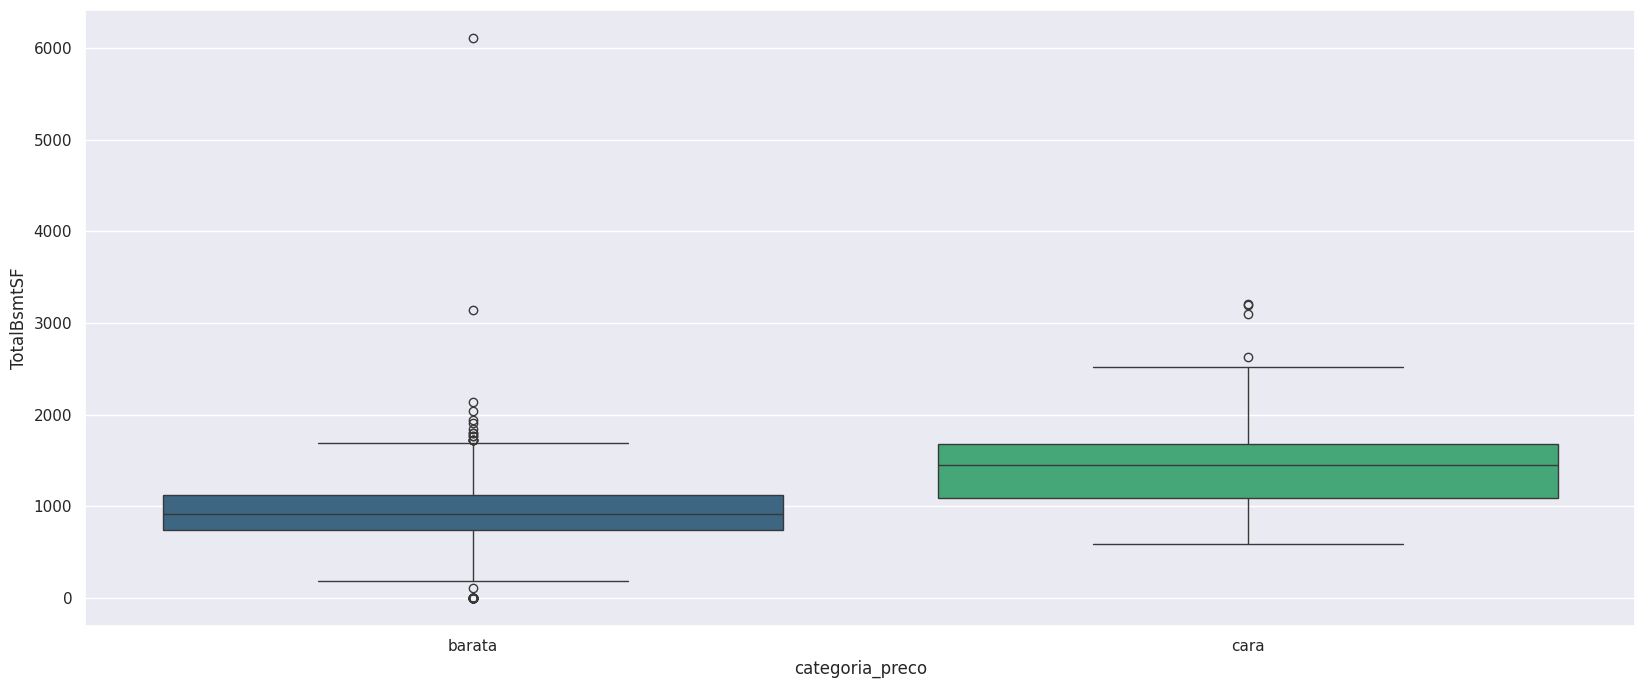

In [70]:
#analisando área total do porão por categoria de preço

fig = sns.boxplot(x= 'categoria_preco', y = 'TotalBsmtSF', data = df, palette = 'viridis')
print('média:', df.groupby('categoria_preco')['TotalBsmtSF'].mean())
print('mediana:', df.groupby('categoria_preco')['TotalBsmtSF'].median())

<ipython-input-71-8ff546bfe77c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x = 'categoria_preco', y = 'YearBuilt', data = df, palette = 'viridis')


média: categoria_preco
barata    1964.303279
cara      1992.392265
Name: YearBuilt, dtype: float64
mediana: categoria_preco
barata    1965.5
cara      2002.0
Name: YearBuilt, dtype: float64


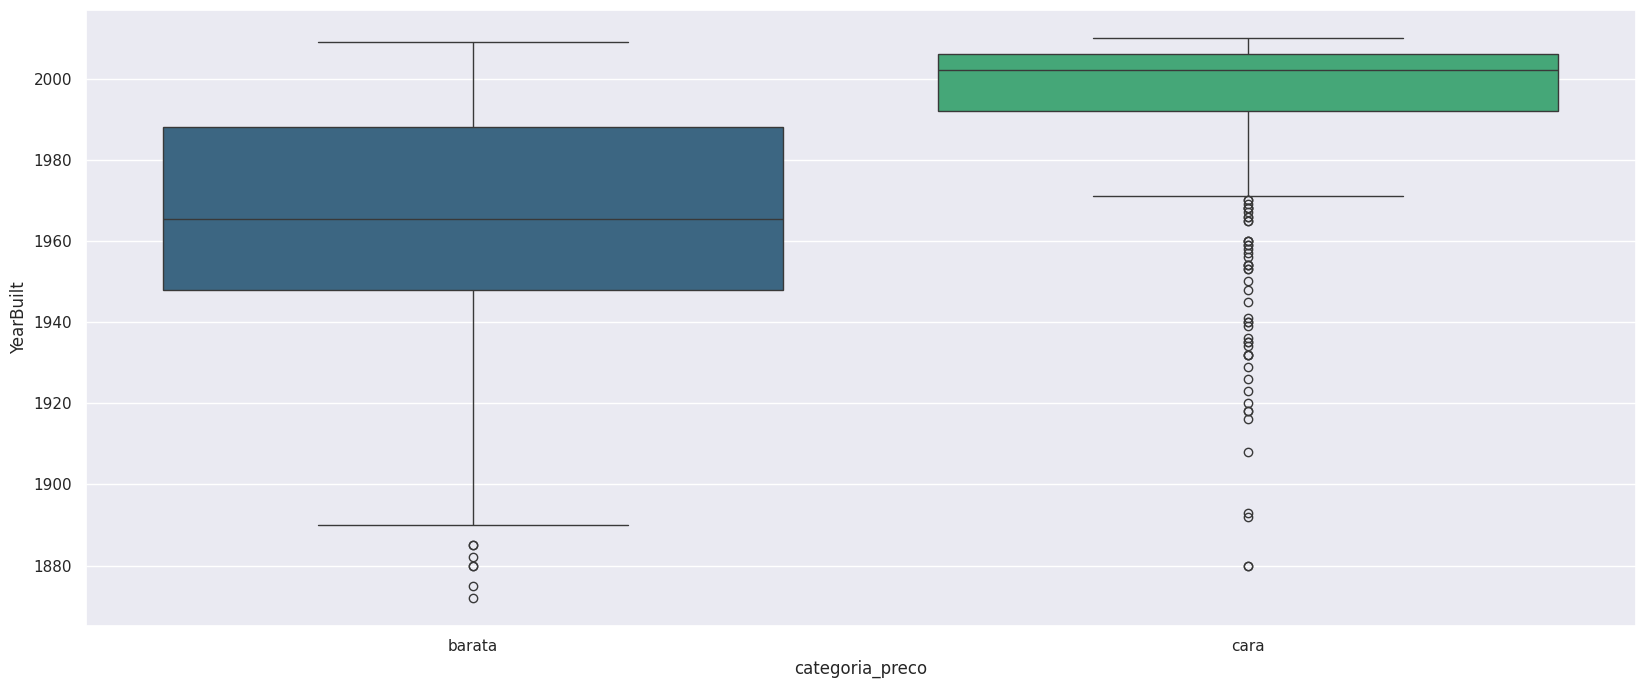

In [71]:
#analisando ano de venda da casa por categoria de preço

fig = sns.boxplot(x = 'categoria_preco', y = 'YearBuilt', data = df, palette = 'viridis')
print('média:', df.groupby('categoria_preco')['YearBuilt'].mean())
print('mediana:', df.groupby('categoria_preco')['YearBuilt'].median())


# Correlação

Falamos que duas variáveis estão extremamente correlacionadas se:
- uma cresce e a outra cresce;
- uma diminui e a outra cresce;
- uma cresce e a outra necessariamente diminui;
- uma diminui e a outra necessariamente cresce.

Para uma correlação ser perfeita, um ponto deve estar em cima do outro formando uma linha perfeita. Do contrário, pode ser traçada uma linha de tendência para falar da correlação.

Na imagem abaixo é possível notar uma correlação no primeiro e terceiro gráfico, enquanto no segundo conforme X aumenta Y aparenta estar no mesmo patamar.

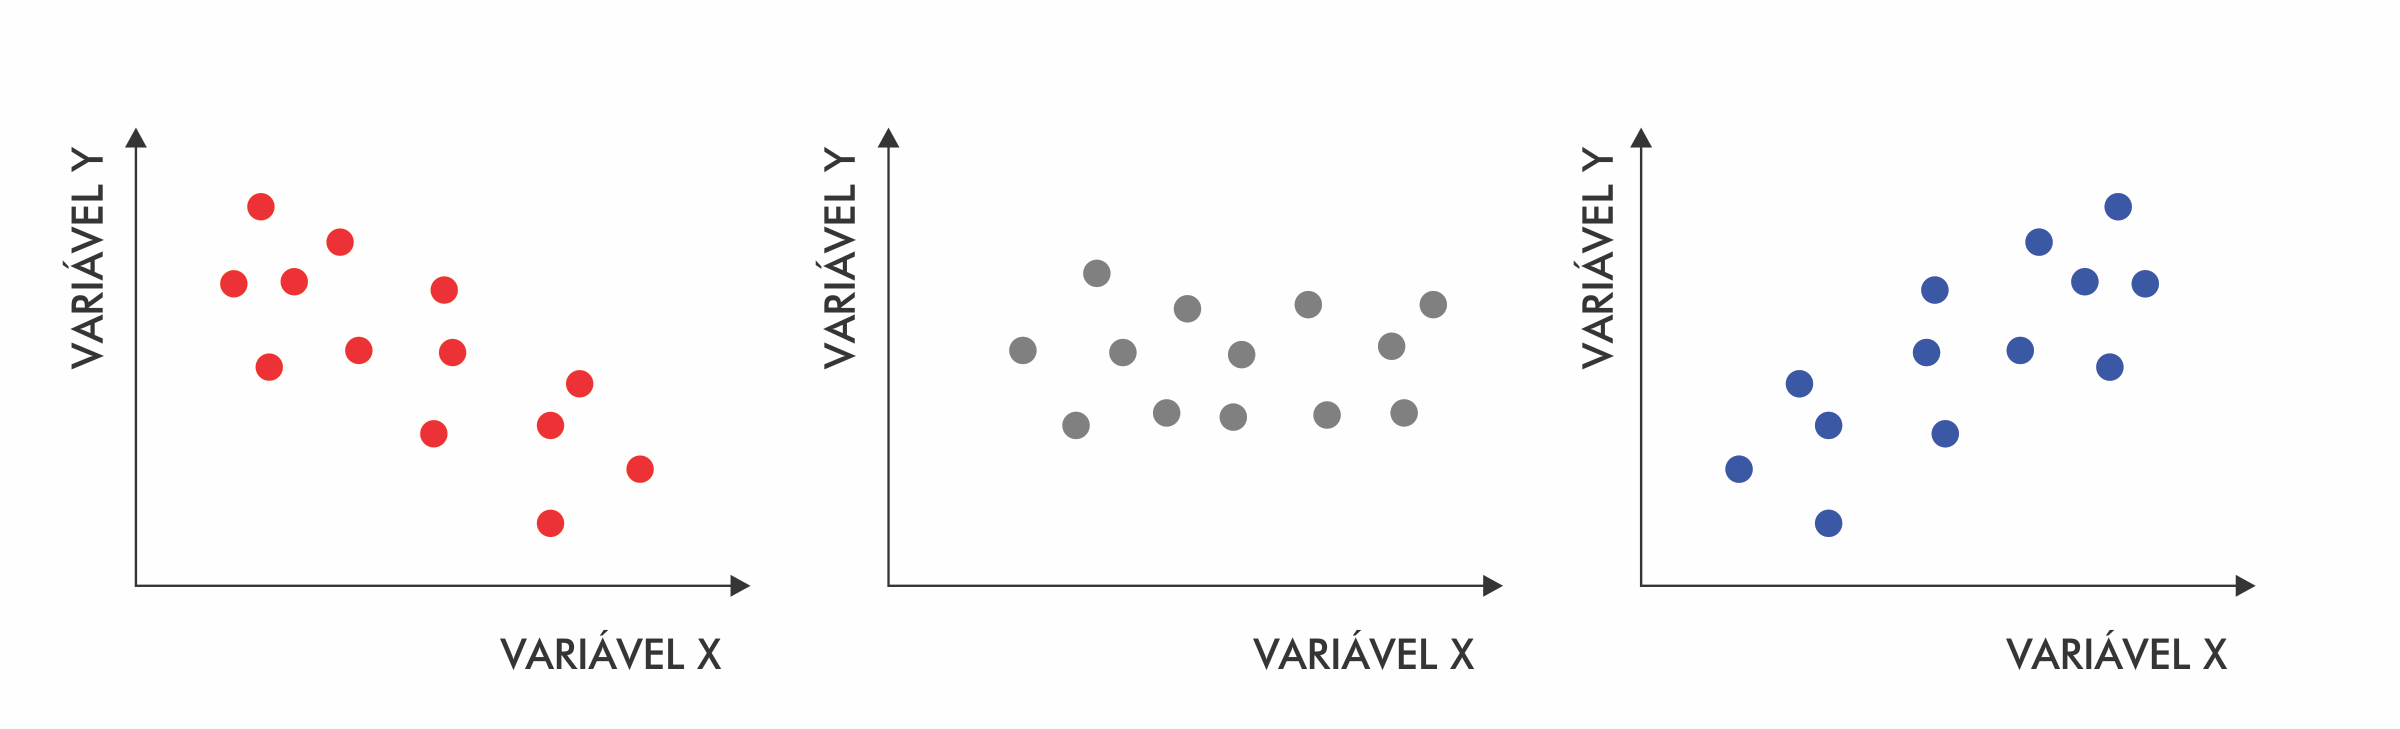

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

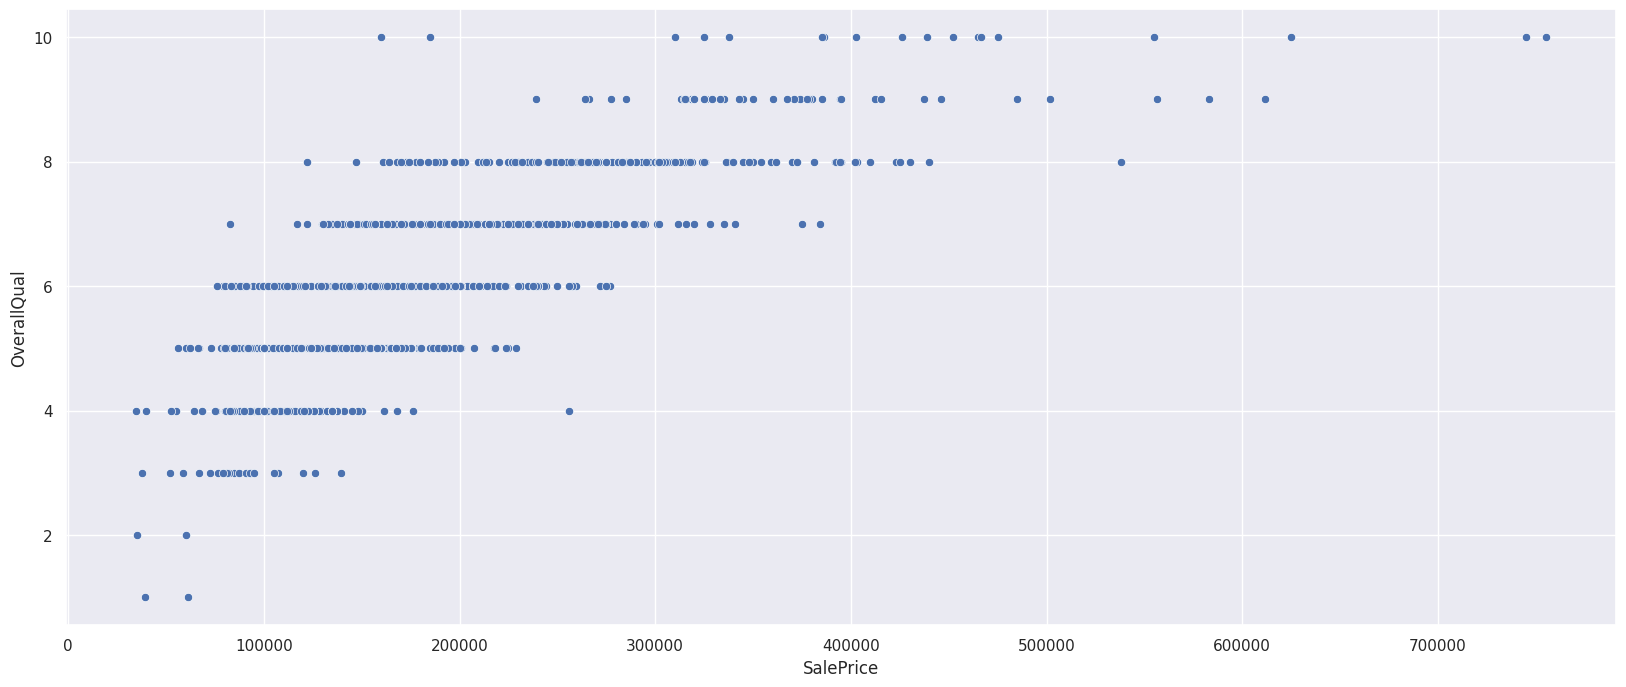

In [72]:
# Analisando por meio de um scatterplot a qualidade geral das casas

sns.scatterplot(x = 'SalePrice', y = 'OverallQual', data = df)

Como o OverallQual é uma variável discreta, ele vai deixar o gráfico sempre em linha reta, já que não assume valores diferentes de inteiro. Por isso, fica difícil ver a correlação com variáveis discretas.
Nesse caso, é melhor fazer a análise por um boxplot.

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

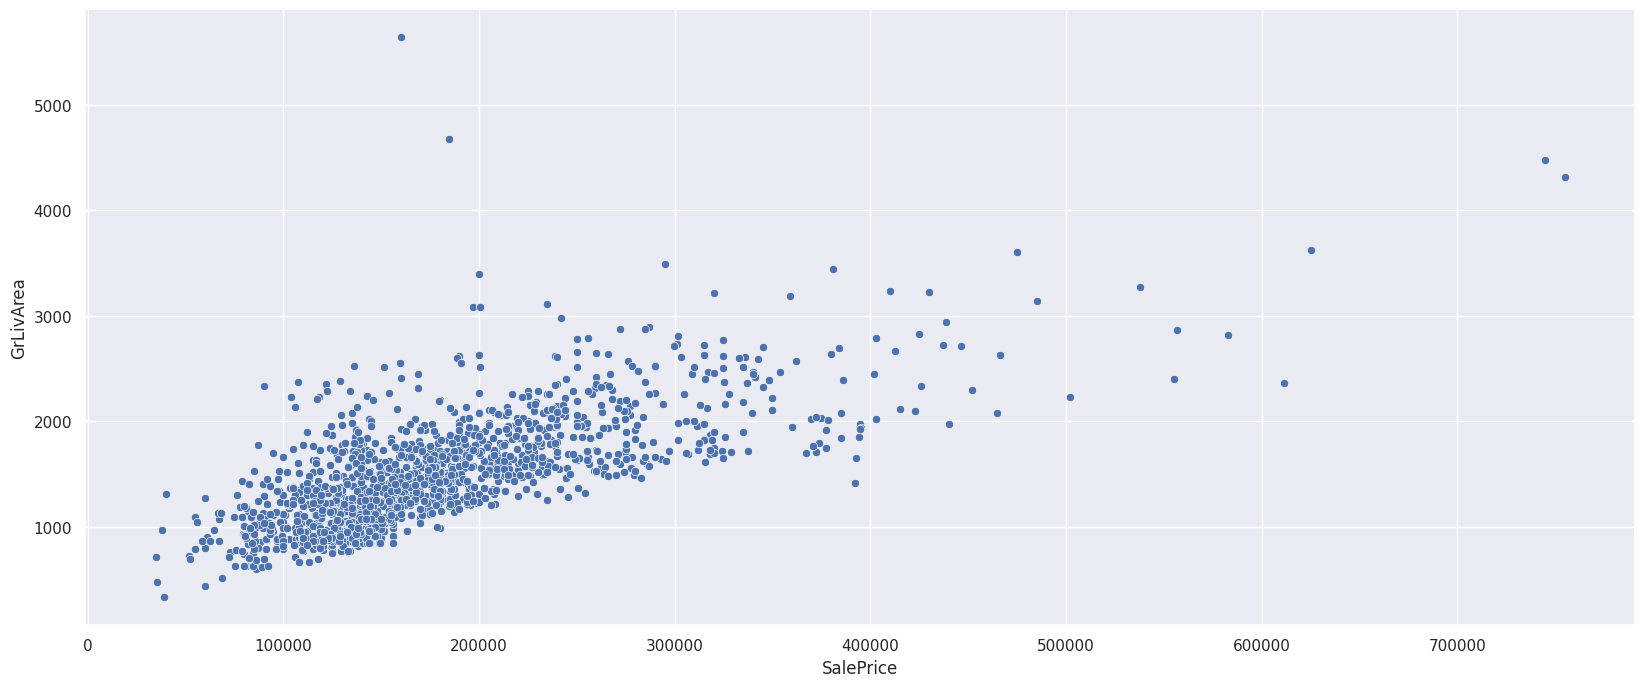

In [73]:
# Área construída

sns.scatterplot(x='SalePrice', y = 'GrLivArea', data = df)

Aqui não temos uma correlação perfeita também. Porém, pode-se traçar uma linha no meio do gráfico e tentar ver uma tendência de aumento conforme aumenta a área.

<Axes: xlabel='SalePrice', ylabel='YearBuilt'>

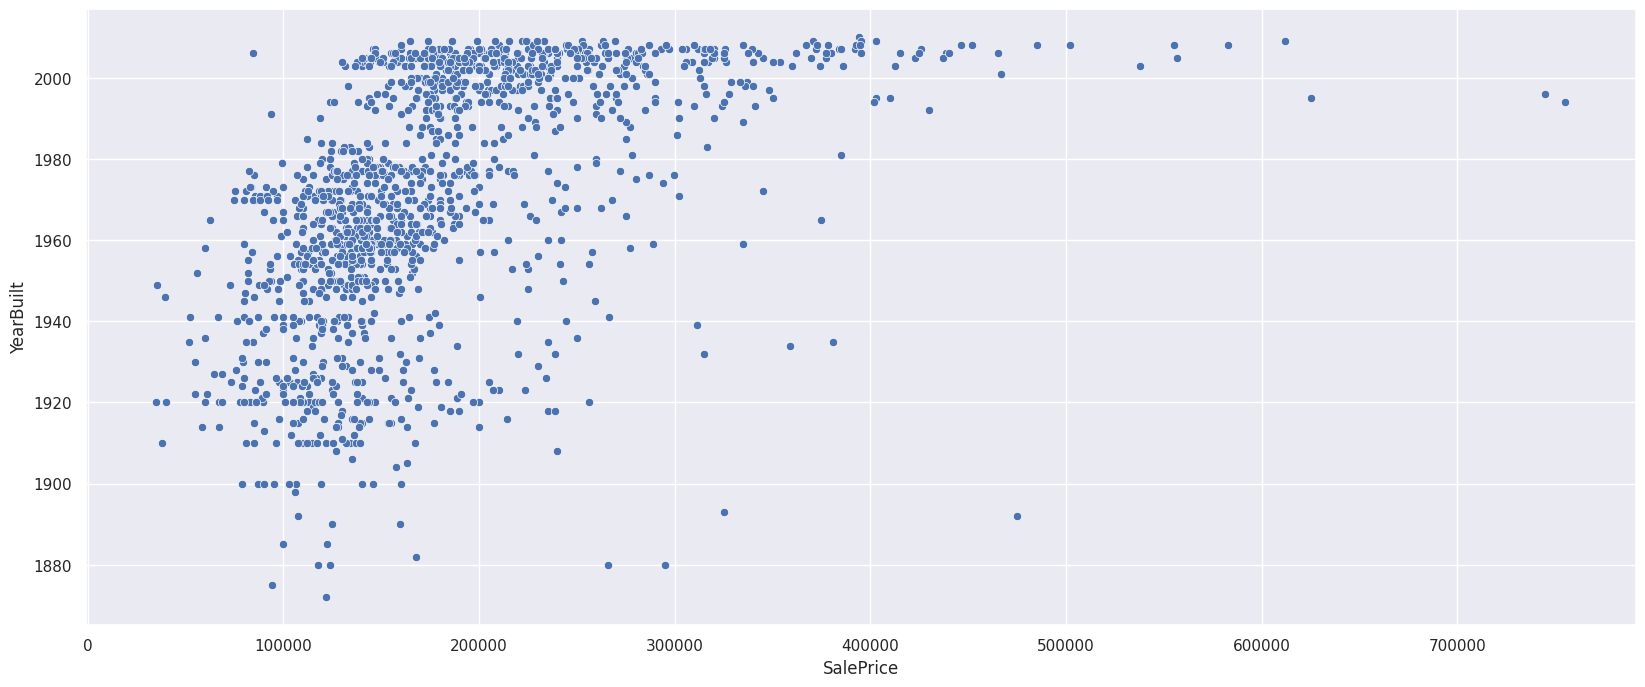

In [74]:
sns.scatterplot(x='SalePrice', y = 'YearBuilt', data = df)

Desse gráfico não se pode tirar quase nenhuma informação, a visualização está ruim para enxergar correlação.

# Boxplot sem segregação de preço

<ipython-input-75-a3678418f487>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='OverallQual', y ='SalePrice', data = df, palette = 'viridis')


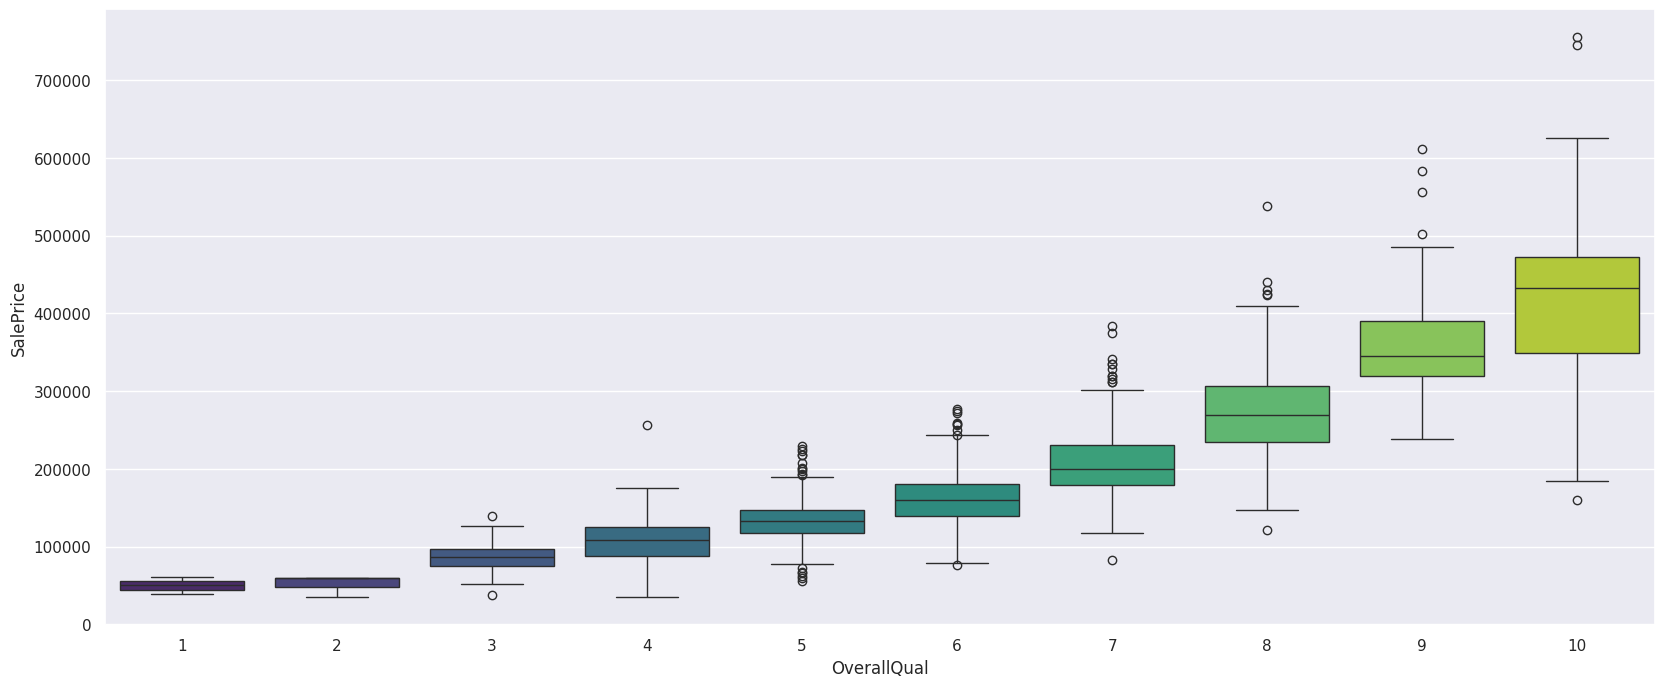

In [75]:
#Analisando a distribuição do preço de vendas da casa pela qualidade dela

sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x='OverallQual', y ='SalePrice', data = df, palette = 'viridis')

Esse tipo de boxplot que tem o eixo X dessa forma vai funcionar somente para variáveis discretas ou categóricas.

Por esse boxplot, aparentemente existe uma tendência de aumento. Poderia ser feita uma correlação pra ver qual a tendência? Um teste de hipótese?

<ipython-input-76-e5df1e7737da>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x = 'YearBuilt', y= 'SalePrice', data = df, palette = 'viridis')


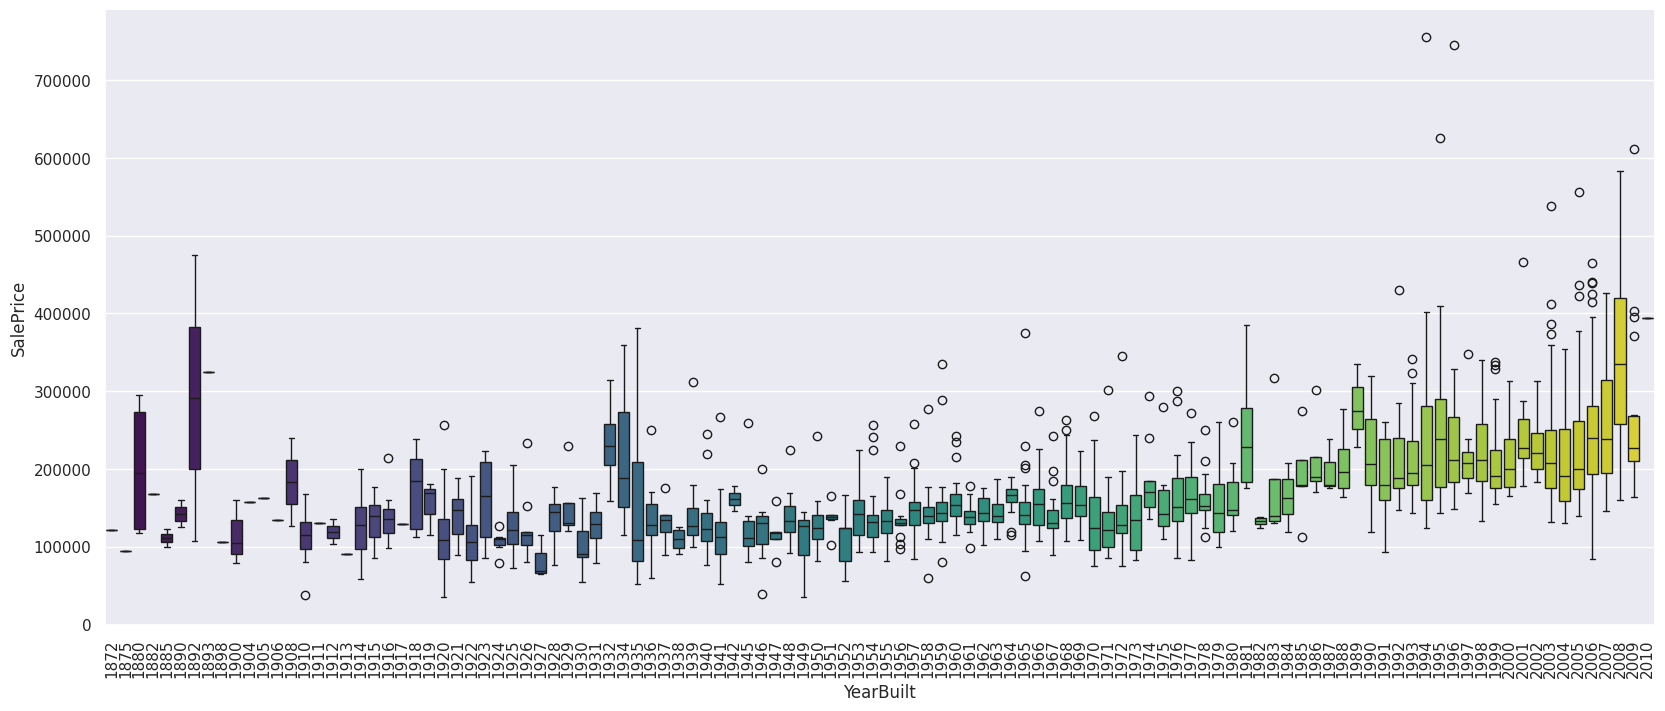

In [76]:
sns.set(rc = {'figure.figsize':(20,8)})
fig = sns.boxplot(x = 'YearBuilt', y= 'SalePrice', data = df, palette = 'viridis')
plt.xticks(rotation = 90);

Desse gráfico também não é possível tirar nenhuma informação relevante. Assim como pode-se verificar que a hipótese criada anteriormente de que quanto mais antiga a casa, mais cara ela é, também não pode ser validada através dele.

<ipython-input-81-50f4ed766eba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='MSZoning', y='SalePrice', data = df, palette = 'viridis')


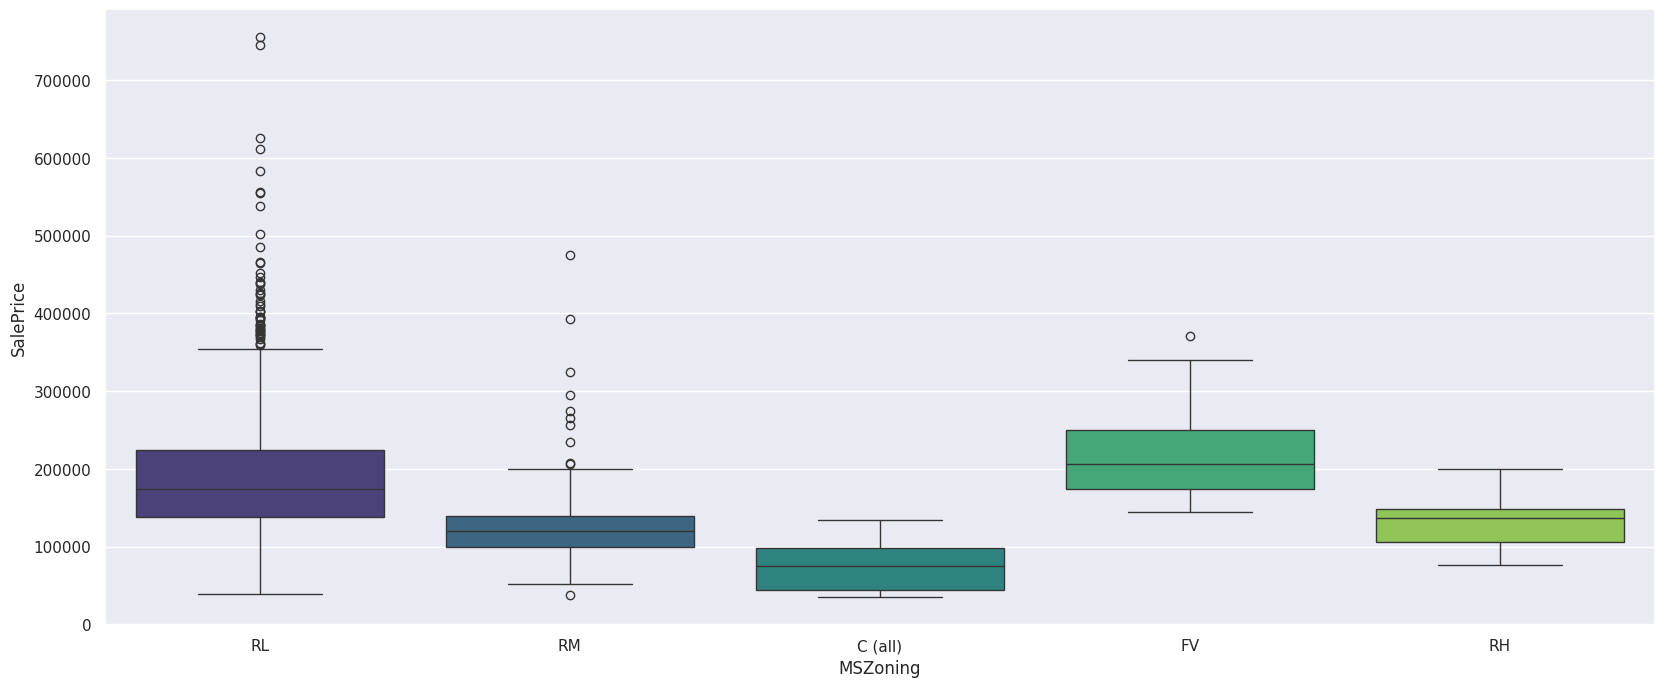

In [81]:
fig = sns.boxplot(x='MSZoning', y='SalePrice', data = df, palette = 'viridis')

<ipython-input-83-fa6b040672a3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='Utilities', y= 'SalePrice', data = df, palette = 'viridis')


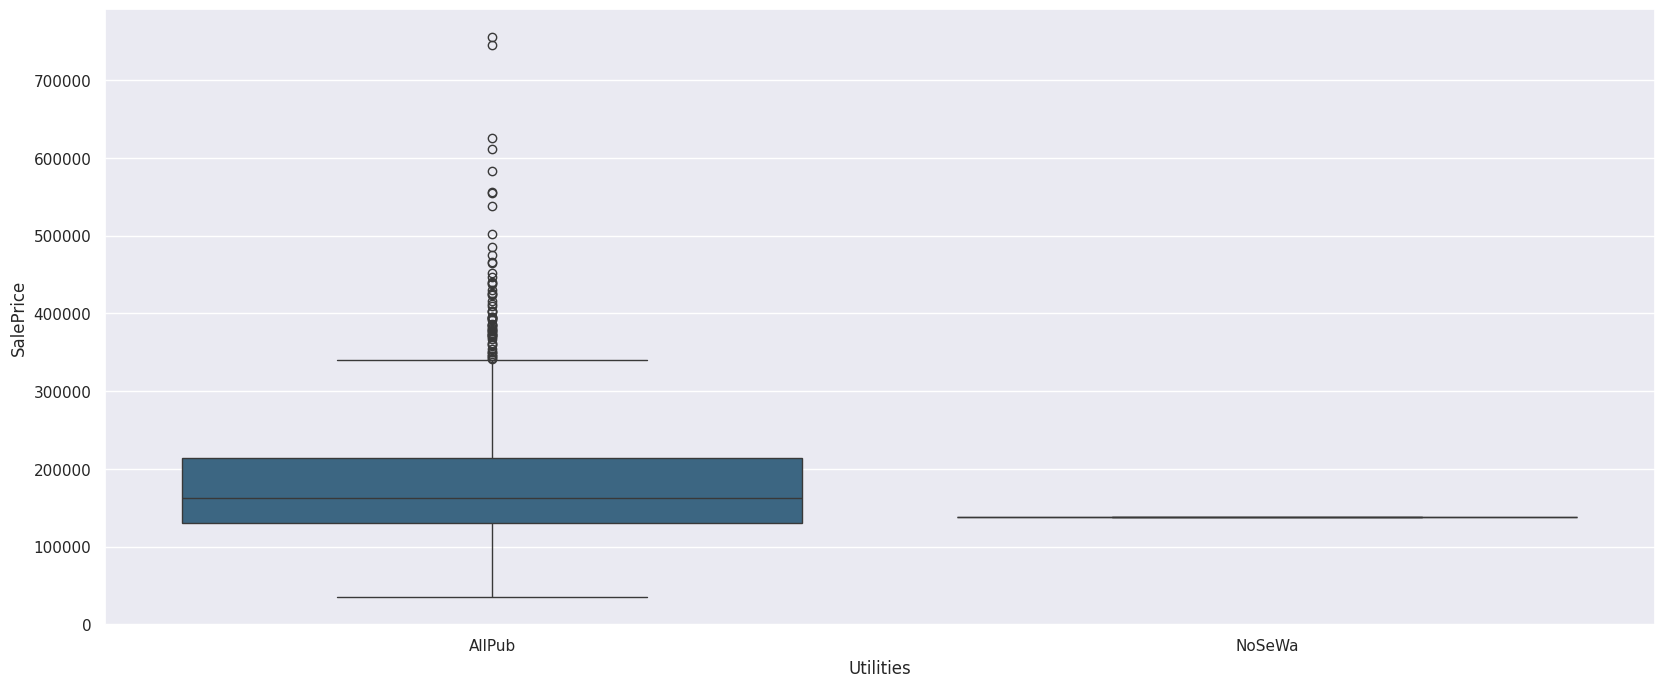

In [83]:
fig = sns.boxplot(x='Utilities', y= 'SalePrice', data = df, palette = 'viridis')

In [87]:
df.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Também não consigo tirar nada da categoria de Utilities só com esse gráfico

<ipython-input-88-426eddf9faeb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='BldgType', y = 'SalePrice', data = df, palette = 'viridis')


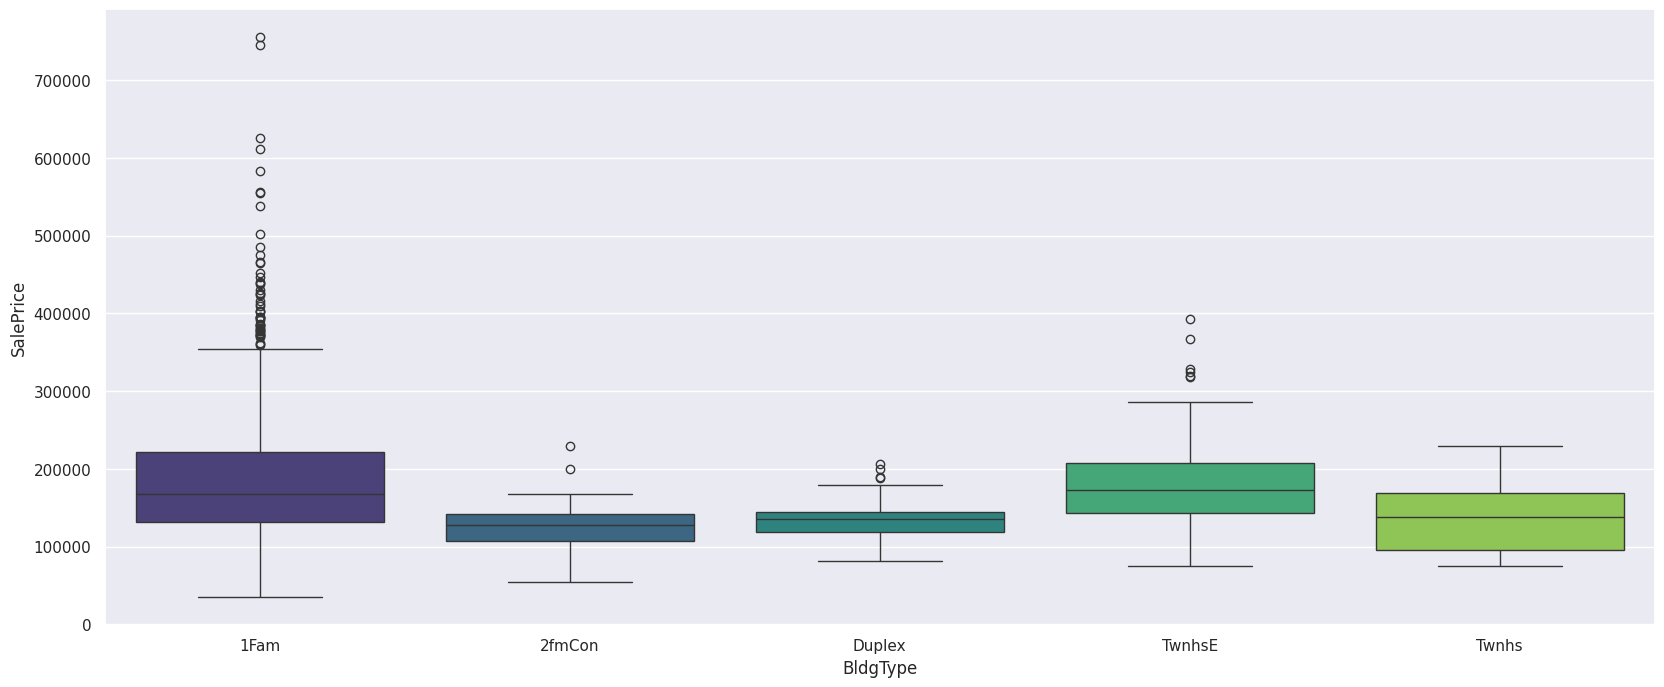

In [88]:
fig = sns.boxplot(x='BldgType', y = 'SalePrice', data = df, palette = 'viridis')

# Dispersão

Agora é preciso entender o comportamento perante a distribuição de features e/ou target numéricos. É importante responder, por exemplo, se:

1. A distribuição é normal? Essa pergunta deve ser feita pois diversas outras estatísticas são aplicadas apenas em distribuições normais (distribuições paramétricas);
2. Qual é o desvio padrão da distribuição? Será que os dados variam muito?
3. Qual seria a curtose dessa distribuição? Com isso, é possível entender se existem mais ou menos dados concentrados na cauda;
4. Se não for normal, qual é a skew dessa distribuição? Com isso, é possível entender se a causa é desviada mais para a direita ou esquerda.

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

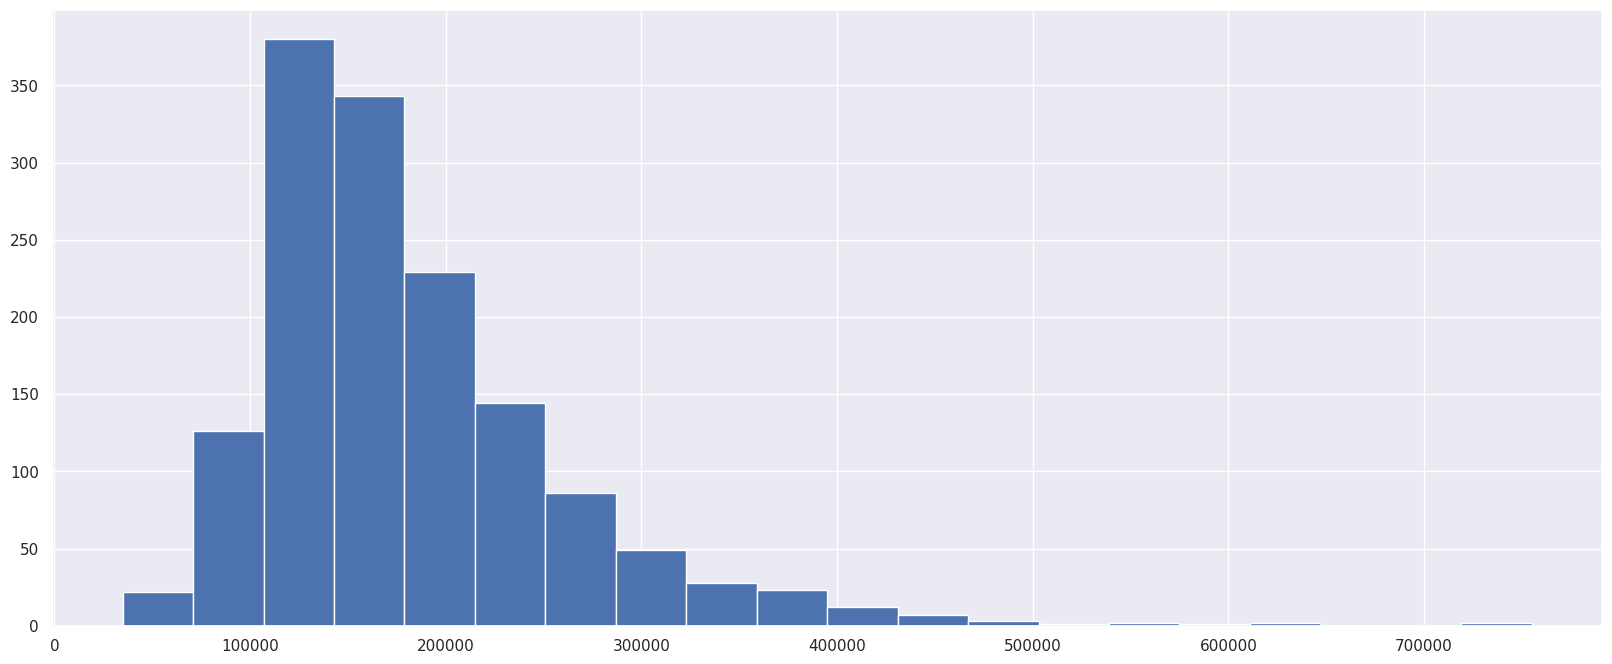

In [92]:
#Sale

plt.hist(df['SalePrice'], bins=20) #o número de bins é a quantidade que vai ser feita a discretização dos dados

É possível notar que a distribuição apresenta uma cauda longa, indicando que não é normal. Ela está deslocada para a direita, mostrando que existem alguns valores com um preço muito mais alto (são os outliers).

In [94]:
# Calculando o desvio padrão da amostra

desvio = df['SalePrice'].std()
desvio

79442.50288288662

Como visto anteriormente, a média era 180.9k.
Temos um desvio alto a julgar pelo valor da média, já que ele é de 79.4k.
Para verificar isso com mais certeza, pode-se calcular o coeficiente de variancia e analisar isso percentualmente.

In [95]:
coef_variancia = (desvio/df['SalePrice'].mean())*100
coef_variancia

43.91000318780071

Com um resultado de 43.9% o coeficiente de variancia indica que o desvio padrão representa 43.9% da média. É um número muito representativo em relação à média.

É importante notar que os outliers estão puxando o desvio padrão para cima.

# Skew

Devemos calcular o skew para entender onde os outliers estão mais concentrados

In [96]:
# Assimetria

from scipy.stats import skew
skew(df['SalePrice'])

1.880940746034036

Com skew = 1.8 temos uma assimetria positiva, indicando que os outliers estão concentrados a direita, assim como foi possível ver pelo histograma.

**Essas métricas são úteis quando temos muitas colunas para analisar e não conseguimos analisar grafico por grafico. Assim, é possível medir a assimetria e a curtose para uma análise mais rápida e assertiva.**
